Nama : Muhammad Akmalluddin </br>
NIM : 1306621014 </br>
Prodi : Fisika

## Problem Description

Mencoba melakukan dimensionality reduction untuk melihat bagaimana bentuk grafik menggunakan metode PCA

### Mengolah Data

In [228]:
import pandas as pd

grad = pd.read_csv('gradmax.csv')
fft = pd.read_csv('fftmax.csv')

In [229]:
grad.head()

,gradmax F1,gradmax F2,gradmax F3,gradmax F4,gradmax F5,gradmax F6,gradmax F7,gradmax F8,gradmax F9,gradmax F10,label
0,190.000,14.375,1.25,638.125,270.625,185.000,4.375,1073.750,561.875,1053.125,A
1,274.375,23.750,2.50,840.625,416.250,271.875,6.250,1433.125,710.000,1261.250,A
2,110.000,7.500,1.25,414.375,138.125,100.000,3.125,670.000,335.000,734.375,A
3,145.000,10.000,1.25,533.750,201.250,138.750,3.750,889.375,451.250,895.625,A
4,212.500,16.875,1.25,703.125,306.250,216.875,4.375,1177.500,579.375,1075.000,A


In [230]:
fft.tail()

,fouriermax F1,fouriermax F2,fouriermax F3,fouriermax F4,fouriermax F5,fouriermax F6,fouriermax F7,fouriermax F8,fouriermax F9,fouriermax F10,label
65,180673.39125,17999.31875,430.55625,261986.7600,141973.67000,88574.12875,2032.10000,406189.21375,270867.02500,380756.53500,B
66,207409.01625,26045.56875,643.99125,287104.4050,173256.26375,107386.72250,2038.96250,426415.25000,295451.24750,400371.67625,B
67,199464.88125,24233.87750,501.84375,269990.9925,167053.70250,105470.18250,2183.60375,408965.07125,278000.59750,385463.89375,B
68,207922.19875,27055.96500,622.86625,289632.7150,180980.31000,115766.44000,4298.31375,423210.44125,290233.48375,400907.73375,B
69,197262.60375,22544.25250,582.96625,276577.7275,161461.05625,100540.05750,1653.01375,418283.37375,280688.87000,389465.30125,B


Kita lihat hubungan antar dimensi

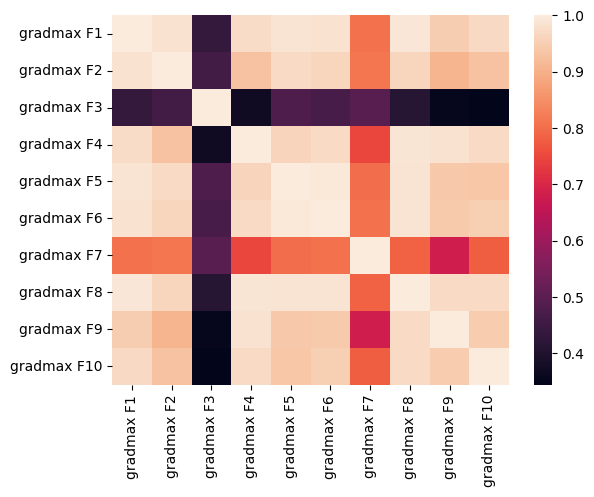

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

#Gradien
grad1 = grad.drop(columns = ['label'])
grad_mean = grad1.mean()
grad_std = grad1.std()
zgrad = (grad1 - grad_mean) / grad_std
covgrad = zgrad.cov()
 

sns.heatmap(covgrad)
plt.show()

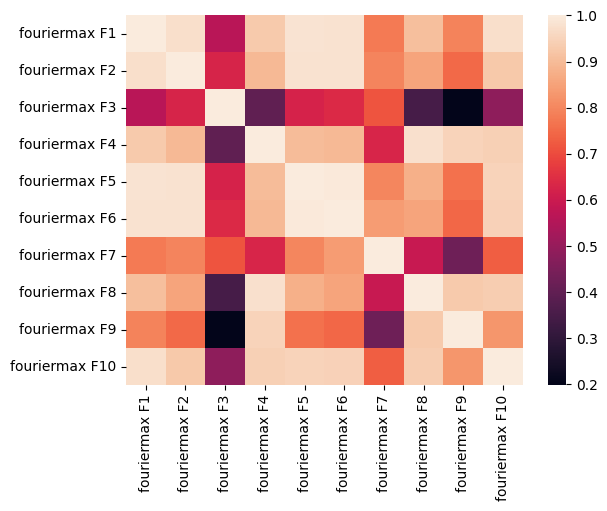

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

#Fourier
fft1 = fft.drop(columns = ['label'])
fft_mean = fft1.mean()
fft_std = fft1.std()
zfft = (fft1 - fft_mean) / fft_std
covfft = zfft.cov()

sns.heatmap(covfft)
plt.show()

dapat terlihat bahwa baik gradmax F3 maupun fouriermax F3 memiliki korelasi yang rendah dengan dimensi lainnya dilihat dari warna hitam

### 1. Analisis komponen dengan PCA untuk kedua data gradmax.csv dan fftmax.csv

Kita standarisasi data terlebih dahulu

In [233]:
#Gradien
grad1 = grad.drop(columns = ['label'])
grad_mean = grad1.mean()
grad_std = grad1.std()
zgrad = (grad1 - grad_mean) / grad_std

#Fourier
fft1 = fft.drop(columns = ['label'])
fft_mean = fft1.mean()
fft_std = fft1.std()
zfft = (fft1 - fft_mean) / fft_std

In [234]:
zgrad.describe()

,gradmax F1,gradmax F2,gradmax F3,gradmax F4,gradmax F5,gradmax F6,gradmax F7,gradmax F8,gradmax F9,gradmax F10
count,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01
mean,-3.679596e-16,-2.950021e-16,7.073707e-16,7.850863e-16,-7.454355e-17,1.982541e-16,2.934161e-16,-2.807278e-16,-2.838999e-16,-3.394110e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.643211e+00,-1.434671e+00,-1.490797e+00,-1.679025e+00,-1.568302e+00,-1.599708e+00,-1.861466e+00,-1.734453e+00,-1.816176e+00,-1.787198e+00
25%,-8.619834e-01,-7.915953e-01,3.400062e-01,-8.776722e-01,-8.620904e-01,-8.953430e-01,-7.572065e-01,-8.194213e-01,-8.391722e-01,-8.236705e-01
50%,-1.685344e-01,-2.556991e-01,3.400062e-01,-6.550484e-02,-2.034475e-01,-2.199640e-01,-2.050768e-01,-1.206470e-01,-1.081766e-01,-5.990799e-02
75%,7.911755e-01,7.089142e-01,3.400062e-01,6.709611e-01,7.460960e-01,6.119406e-01,3.470530e-01,7.487581e-01,7.844814e-01,7.579262e-01
max,2.160518e+00,2.638141e+00,4.001612e+00,2.175255e+00,2.281100e+00,2.226473e+00,2.555572e+00,2.013177e+00,2.110582e+00,2.154027e+00


In [235]:
zfft.describe()

,fouriermax F1,fouriermax F2,fouriermax F3,fouriermax F4,fouriermax F5,fouriermax F6,fouriermax F7,fouriermax F8,fouriermax F9,fouriermax F10
count,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01
mean,1.241864e-15,2.569373e-16,-1.110223e-16,6.344132e-17,-6.074506e-16,-6.153808e-16,-9.833404e-17,1.062642e-16,4.567775e-16,-1.459150e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.025131e+00,-1.400370e+00,-1.374148e+00,-2.439859e+00,-1.778082e+00,-1.746153e+00,-2.410112e+00,-2.389227e+00,-3.280787e+00,-2.171192e+00
25%,-8.617738e-01,-8.180419e-01,-7.636110e-01,-8.198366e-01,-8.290024e-01,-8.541651e-01,-6.638051e-01,-7.601514e-01,-7.854663e-01,-7.168097e-01
50%,-6.456847e-02,-2.802404e-01,-7.387141e-02,5.075321e-02,-2.148033e-01,-1.817877e-01,-1.816928e-01,1.812599e-01,1.746252e-01,9.597284e-02
75%,8.788528e-01,7.626797e-01,5.320587e-01,6.952943e-01,7.381118e-01,7.628164e-01,6.055277e-01,7.284939e-01,7.850534e-01,7.576516e-01
max,1.881161e+00,2.535936e+00,4.611318e+00,1.930516e+00,2.471843e+00,2.468675e+00,2.891382e+00,1.644637e+00,1.665700e+00,1.699525e+00


Tentukan berapa pca yang yang dapat digunakan

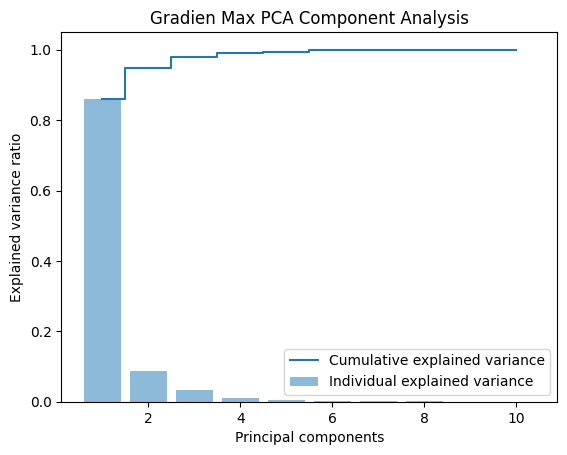

In [236]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(zgrad)

#Berapa PCA yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

#Coba plotting
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Gradien Max PCA Component Analysis')
plt.legend()
plt.show()

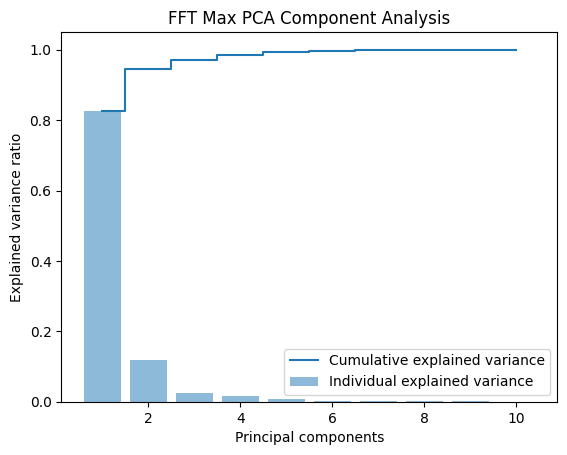

In [237]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(zfft)

#Berapa PCA yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

#Coba plotting
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('FFT Max PCA Component Analysis')
plt.legend()
plt.show()

Disini kita akan mencoba dengan menggunakan 2 dan 3 component

- Untuk gradien max

In [238]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca_grad = PCA(n_components=2)
pcacomponent = pca_grad.fit_transform(zgrad)
gradpca = pd.DataFrame(data = pcacomponent
             , columns = ['principal component 1', 'principal component 2'])

gradpca = pd.concat([gradpca, grad['label']], axis = 1)
gradpca


,principal component 1,principal component 2,label
0,1.520429,0.005550,A
1,6.424538,2.952440,A
2,-2.867638,0.794663,A
3,-0.743729,0.386804,A
4,2.513486,-0.173943,A
...,...,...,...
65,0.900811,0.159552,B
66,3.462707,-0.678394,B
67,2.098708,-1.998525,B
68,4.100140,-0.117478,B


In [239]:
print('Varians per PCA component adalah : {}, dengan total {}'.format(pca_grad.explained_variance_ratio_ , pca_grad.explained_variance_ratio_.sum()))

Varians per PCA component adalah : [0.86104538 0.08587947], dengan total 0.9469248455049046


In [240]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca1_grad = PCA(n_components=3)
pcacomponent1 = pca1_grad.fit_transform(zgrad)
gradpca1 = pd.DataFrame(data = pcacomponent1
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

gradpca1 = pd.concat([gradpca1, grad['label']], axis = 1)
gradpca1

,principal component 1,principal component 2,principal component 3,label
0,1.520429,0.005550,-0.235348,A
1,6.424538,2.952440,-0.694263,A
2,-2.867638,0.794663,-0.207284,A
3,-0.743729,0.386804,-0.241439,A
4,2.513486,-0.173943,-0.414955,A
...,...,...,...,...
65,0.900811,0.159552,0.057327,B
66,3.462707,-0.678394,-1.119922,B
67,2.098708,-1.998525,-0.195505,B
68,4.100140,-0.117478,0.864169,B


In [241]:
print('Varians per PCA component adalah : {}, dengan total {}'.format(pca1_grad.explained_variance_ratio_ , pca1_grad.explained_variance_ratio_.sum()))

Varians per PCA component adalah : [0.86104538 0.08587947 0.03328688], dengan total 0.9802117234855822


- Untuk fft max

In [242]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca_fft = PCA(n_components=2)
pcacomponent2 = pca_fft.fit_transform(zfft)
fftpca = pd.DataFrame(data = pcacomponent2
             , columns = ['principal component 1', 'principal component 2'])

fftpca = pd.concat([fftpca, grad['label']], axis = 1)
fftpca


,principal component 1,principal component 2,label
0,0.927923,-1.102151,A
1,4.554931,-0.448377,A
2,-3.294202,-0.136832,A
3,-0.990890,-1.122338,A
4,1.993328,-0.241241,A
...,...,...,...
65,0.825934,-0.890024,B
66,3.209670,-0.851106,B
67,2.158679,-0.636368,B
68,3.974560,0.093020,B


In [243]:
print('Varians per PCA component adalah : {}, dengan total {}'.format(pca_fft.explained_variance_ratio_, pca_fft.explained_variance_ratio_.sum()))

Varians per PCA component adalah : [0.82504281 0.11932043], dengan total 0.9443632393104217


In [244]:
ayam = grad.columns
ayam

Index(['gradmax F1', 'gradmax F2', 'gradmax F3', 'gradmax F4', 'gradmax F5',
       'gradmax F6', 'gradmax F7', 'gradmax F8', 'gradmax F9', 'gradmax F10',
       'label'],
      dtype='object')

In [245]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca1_fft = PCA(n_components=3)
pcacomponent3 = pca1_fft.fit_transform(zfft)
fftpca1 = pd.DataFrame(data = pcacomponent3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

fftpca1 = pd.concat([fftpca1, grad['label']], axis = 1)
fftpca1


,principal component 1,principal component 2,principal component 3,label
0,0.927923,-1.102151,0.638655,A
1,4.554931,-0.448377,0.563165,A
2,-3.294202,-0.136832,0.081336,A
3,-0.990890,-1.122338,0.179792,A
4,1.993328,-0.241241,0.240498,A
...,...,...,...,...
65,0.825934,-0.890024,-0.345284,B
66,3.209670,-0.851106,-1.021394,B
67,2.158679,-0.636368,-0.339448,B
68,3.974560,0.093020,0.325141,B


In [246]:
print('Varians per PCA component adalah : {}, dengan total {}'.format(pca1_fft.explained_variance_ratio_, pca1_fft.explained_variance_ratio_.sum()))

Varians per PCA component adalah : [0.82504281 0.11932043 0.0259418 ], dengan total 0.9703050360083078


### 2. Menghitung nilai eigen dan vektor eigen, kemudian melakukan plot: </br>


#### Kita coba lihat vector penyusun dari pca component 

- Gradien max

In [247]:
pca_grad.components_

array([[ 3.38693515e-01,  3.32193764e-01,  1.64501339e-01,
         3.33364742e-01,  3.36985474e-01,  3.37661987e-01,
         2.83295465e-01,  3.38266488e-01,  3.25302234e-01,
         3.29642773e-01],
       [-5.72805690e-02,  4.98265334e-04,  9.24114193e-01,
        -1.50772097e-01, -2.56166406e-04, -1.43015237e-02,
         2.30474503e-01, -9.34276622e-02, -1.78814693e-01,
        -1.61161107e-01]])

In [248]:
pca1_grad.components_

array([[ 3.38693515e-01,  3.32193764e-01,  1.64501339e-01,
         3.33364742e-01,  3.36985474e-01,  3.37661987e-01,
         2.83295465e-01,  3.38266488e-01,  3.25302234e-01,
         3.29642773e-01],
       [-5.72805690e-02,  4.98265334e-04,  9.24114193e-01,
        -1.50772097e-01, -2.56166406e-04, -1.43015237e-02,
         2.30474503e-01, -9.34276622e-02, -1.78814693e-01,
        -1.61161107e-01],
       [-1.36051315e-02,  4.81228252e-02, -3.09216546e-01,
        -1.45104772e-01, -6.44051673e-02, -5.09308177e-02,
         8.78049086e-01, -8.08193492e-02, -3.10199959e-01,
         1.89966785e-02]])

- FFT max

In [249]:
pca_fft.components_

array([[ 0.3439557 ,  0.33909686,  0.2070665 ,  0.33131414,  0.3425701 ,
         0.34251493,  0.27793759,  0.32259029,  0.28898677,  0.33847348],
       [-0.00148518,  0.0810599 ,  0.65714663, -0.25287974,  0.06977937,
         0.10580819,  0.42558582, -0.29358278, -0.45308925, -0.09470314]])

In [250]:
pca1_fft.components_

array([[ 0.3439557 ,  0.33909686,  0.2070665 ,  0.33131414,  0.3425701 ,
         0.34251493,  0.27793759,  0.32259029,  0.28898677,  0.33847348],
       [-0.00148518,  0.0810599 ,  0.65714663, -0.25287974,  0.06977937,
         0.10580819,  0.42558582, -0.29358278, -0.45308925, -0.09470314],
       [ 0.10607255,  0.04342661, -0.70120783, -0.14353501,  0.04982509,
         0.12760131,  0.57756156, -0.10348457, -0.30894637,  0.12676404]])

#### Kita coba cari nilai eigen dari tiap fitur

- Gradien max

In [251]:
import numpy as np

# Mencari eigen
c1 = zgrad.cov()
eigenvalues1, eigenvectors1 = np.linalg.eig(c1)

# Mencetak eigenvalues dan eigenvectors
print("Eigenvalues:")
print(eigenvalues1)
print("\nEigenvectors:")
print(eigenvectors1)

Eigenvalues:
[8.61045378e+00 8.58794673e-01 3.32868780e-01 9.38198817e-02
 5.11456749e-02 3.12654027e-02 1.00223013e-02 6.87379822e-03
 2.01907365e-03 2.73663272e-03]

Eigenvectors:
[[ 3.38693515e-01 -5.72805690e-02 -1.36051315e-02  2.16016266e-01
  -1.74040732e-01  6.92517162e-02  3.72806711e-01  2.11437195e-01
  -3.27671976e-01  7.13450826e-01]
 [ 3.32193764e-01  4.98265334e-04  4.81228252e-02  6.20706868e-01
  -3.27087268e-01  4.62769606e-01 -2.77133892e-02 -2.39213488e-01
   1.14935449e-01 -3.31226752e-01]
 [ 1.64501339e-01  9.24114193e-01 -3.09216546e-01 -1.17929826e-01
  -9.47975054e-02  4.46207546e-03  1.57884685e-02  1.03509824e-02
   4.15070621e-03 -7.05881054e-03]
 [ 3.33364742e-01 -1.50772097e-01 -1.45104772e-01 -3.34950269e-01
   1.14765303e-01  2.56660669e-02  6.72375205e-01 -2.36031350e-01
   4.42480557e-01 -1.24380732e-01]
 [ 3.36985474e-01 -2.56166406e-04 -6.44051673e-02  3.14792160e-01
   3.59935170e-01 -2.85056246e-01 -3.44558387e-01  2.07495854e-01
   5.90553274e-01 

- FFT max

In [252]:
import numpy as np

# Mencari eigen
c2 = zfft.cov()
eigenvalues2, eigenvectors2 = np.linalg.eig(c2)

# Mencetak eigenvalues dan eigenvectors
print("Eigenvalues:")
print(eigenvalues2)
print("\nEigenvectors:")
print(eigenvectors2)

Eigenvalues:
[8.25042808e+00 1.19320432e+00 2.59417967e-01 1.52792304e-01
 7.52677201e-02 2.95148730e-02 2.05965586e-02 9.99442068e-03
 7.79050593e-03 9.93258046e-04]

Eigenvectors:
[[ 0.3439557   0.00148518 -0.10607255  0.27840976  0.11661714  0.08225987
  -0.22980167 -0.75413687 -0.38718982  0.03339844]
 [ 0.33909686 -0.0810599  -0.04342661  0.33943142 -0.42200919 -0.42466551
  -0.50076179  0.37547329 -0.09796527 -0.03963256]
 [ 0.2070665  -0.65714663  0.70120783 -0.11843758  0.12680372  0.03846915
  -0.02762498 -0.00140034 -0.03167107 -0.01531881]
 [ 0.33131414  0.25287974  0.14353501 -0.19732038 -0.06097798  0.03129843
  -0.27763184 -0.22922871  0.73896545  0.29385724]
 [ 0.3425701  -0.06977937 -0.04982509  0.31676602 -0.14272419 -0.00826602
   0.62304644  0.10285613 -0.01796609  0.59617595]
 [ 0.34251493 -0.10580819 -0.12760131  0.20145964 -0.208393    0.20934745
   0.34001932 -0.06298243  0.32513789 -0.70857003]
 [ 0.27793759 -0.42558582 -0.57756156 -0.62501393 -0.05507607 -0.028

<font color='#00FA9A'>a. Scree plot untuk nilai-nilai eigen</font>

- Gradien max

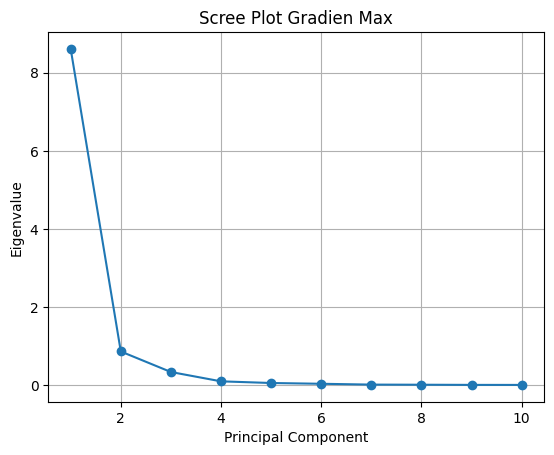

[8.61045378e+00 8.58794673e-01 3.32868780e-01 9.38198817e-02
 5.11456749e-02 3.12654027e-02 1.00223013e-02 6.87379822e-03
 2.73663272e-03 2.01907365e-03]


In [253]:
import numpy as np
import matplotlib.pyplot as plt

#urutkan nilai eigen
sorted_indices = np.argsort(eigenvalues1)[::-1]
eigenvalues1 = eigenvalues1[sorted_indices]

#kita plotting
plt.plot(np.arange(1, len(eigenvalues1) + 1), eigenvalues1, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot Gradien Max')
plt.grid(True)
plt.show()

print(eigenvalues1)

- FFT max

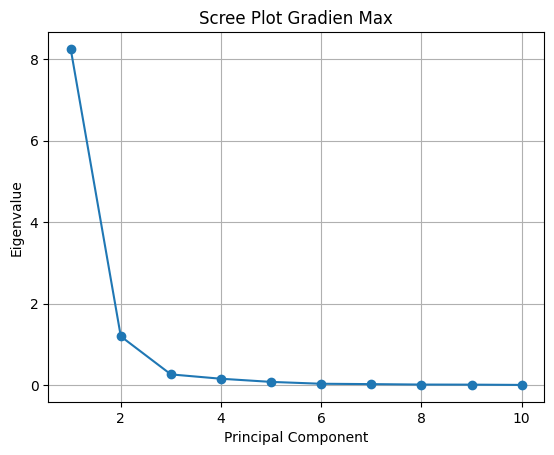

[8.25042808e+00 1.19320432e+00 2.59417967e-01 1.52792304e-01
 7.52677201e-02 2.95148730e-02 2.05965586e-02 9.99442068e-03
 7.79050593e-03 9.93258046e-04]


In [254]:
import numpy as np
import matplotlib.pyplot as plt

#urutkan nilai eigen
sorted_indices = np.argsort(eigenvalues2)[::-1]
eigenvalues2 = eigenvalues2[sorted_indices]

#kita plotting
plt.plot(np.arange(1, len(eigenvalues2) + 1), eigenvalues2, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot Gradien Max')
plt.grid(True)
plt.show()

print(eigenvalues2)

<font color='#00FA9A'>b. Biplot (score plot dan loading plot)</font>

Kita akan coba plotting score plot, loading plot, dan biplot

- Gradien max

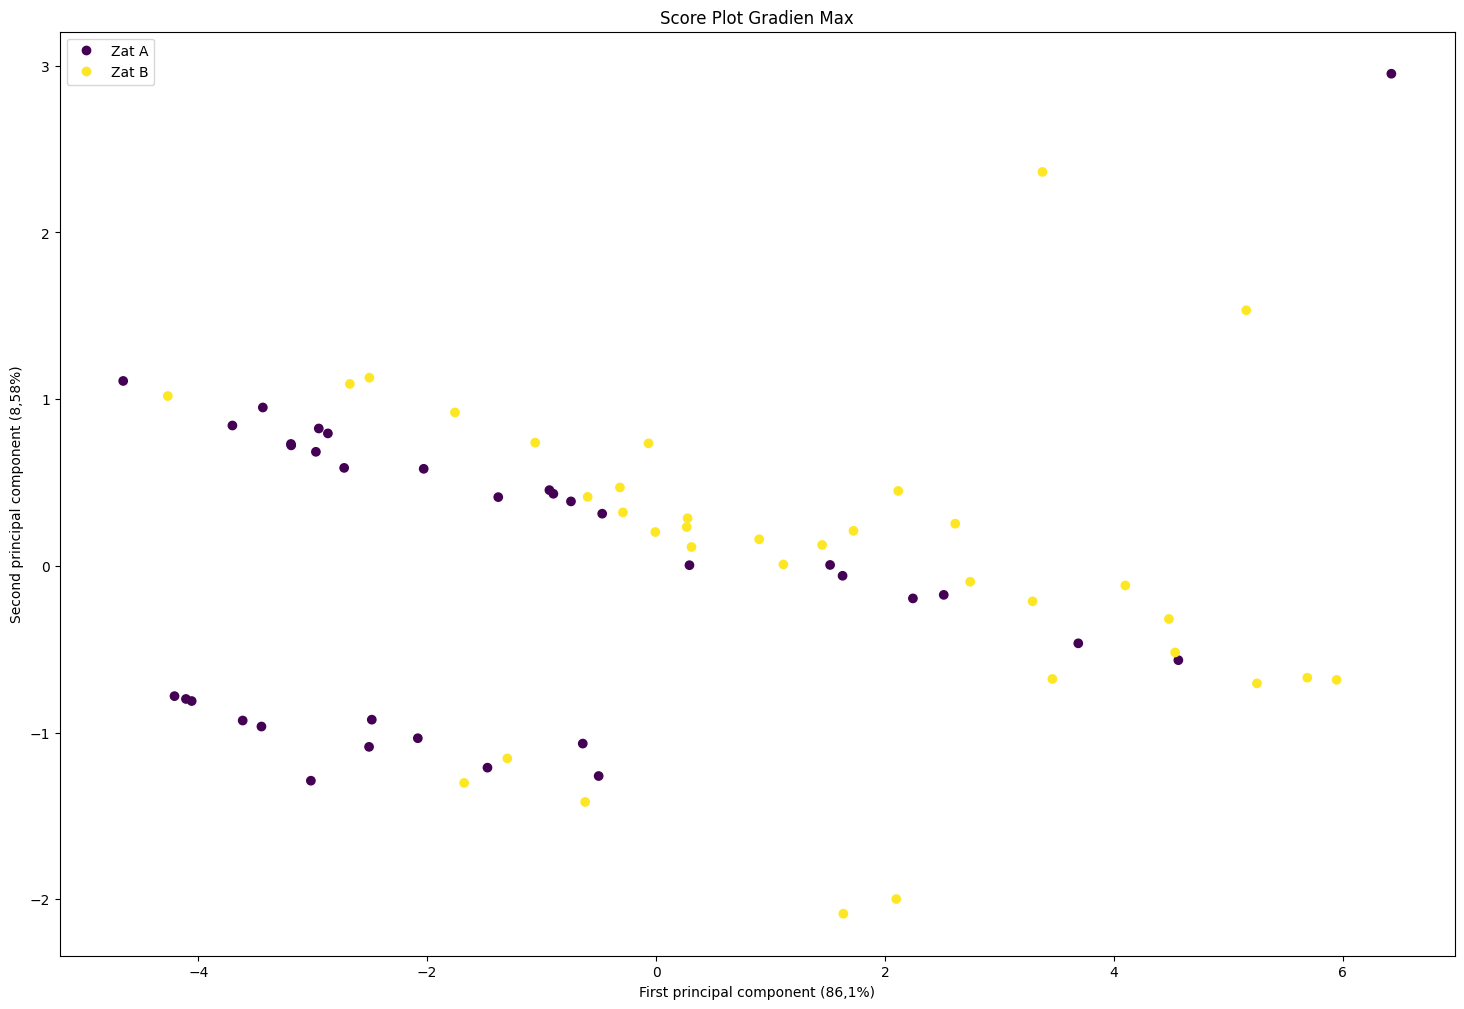

In [255]:
# Kita ubah label dari A dan B menjadi 0 dan 1
input_list = np.array(grad['label'])
b = [0 if x == 'A' else 1 for x in input_list]

# Kita plotting 
plt.figure(figsize = (18, 12))
scatter = plt.scatter(pcacomponent[:, 0], pcacomponent[:, 1], c=b)
legend_labels = ['Zat A', 'Zat B']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('Score Plot Gradien Max')
plt.xlabel('First principal component (86,1%)')
plt.ylabel('Second principal component (8,58%)')
plt.show()

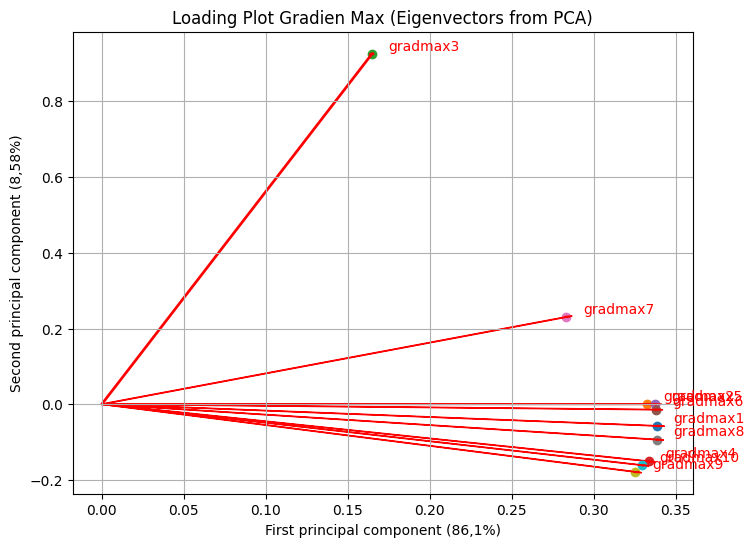

In [256]:
import numpy as np
import matplotlib.pyplot as plt

# Menyortir eigenvalue dan eigenvector secara menurun
sorted_indices = np.argsort(eigenvalues1)[::-1]
eigenvalues1 = eigenvalues1[sorted_indices]
eigenvectors1 = eigenvectors1[:, sorted_indices]
loadings = pca_grad.components_

# Memplot eigenvector
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(loadings[0, i], loadings[1, i])
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], fc='r', ec='r')
    plt.text(loadings[0, i] + 0.01 , loadings[1, i] + 0.01, f'gradmax{i+1}', color='r')

plt.xlabel('First principal component (86,1%)')
plt.ylabel('Second principal component (8,58%)')
plt.title('Loading Plot Gradien Max (Eigenvectors from PCA)')
plt.grid(True)
plt.show()

In [257]:
# Kita lihat titik dari eigen vector

loadings1 = pd.DataFrame(pca_grad.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=zgrad.columns)
loadings1

,Principal Component 1,Principal Component 2
gradmax F1,0.338694,-0.057281
gradmax F2,0.332194,0.000498
gradmax F3,0.164501,0.924114
gradmax F4,0.333365,-0.150772
gradmax F5,0.336985,-0.000256
gradmax F6,0.337662,-0.014302
gradmax F7,0.283295,0.230475
gradmax F8,0.338266,-0.093428
gradmax F9,0.325302,-0.178815
gradmax F10,0.329643,-0.161161


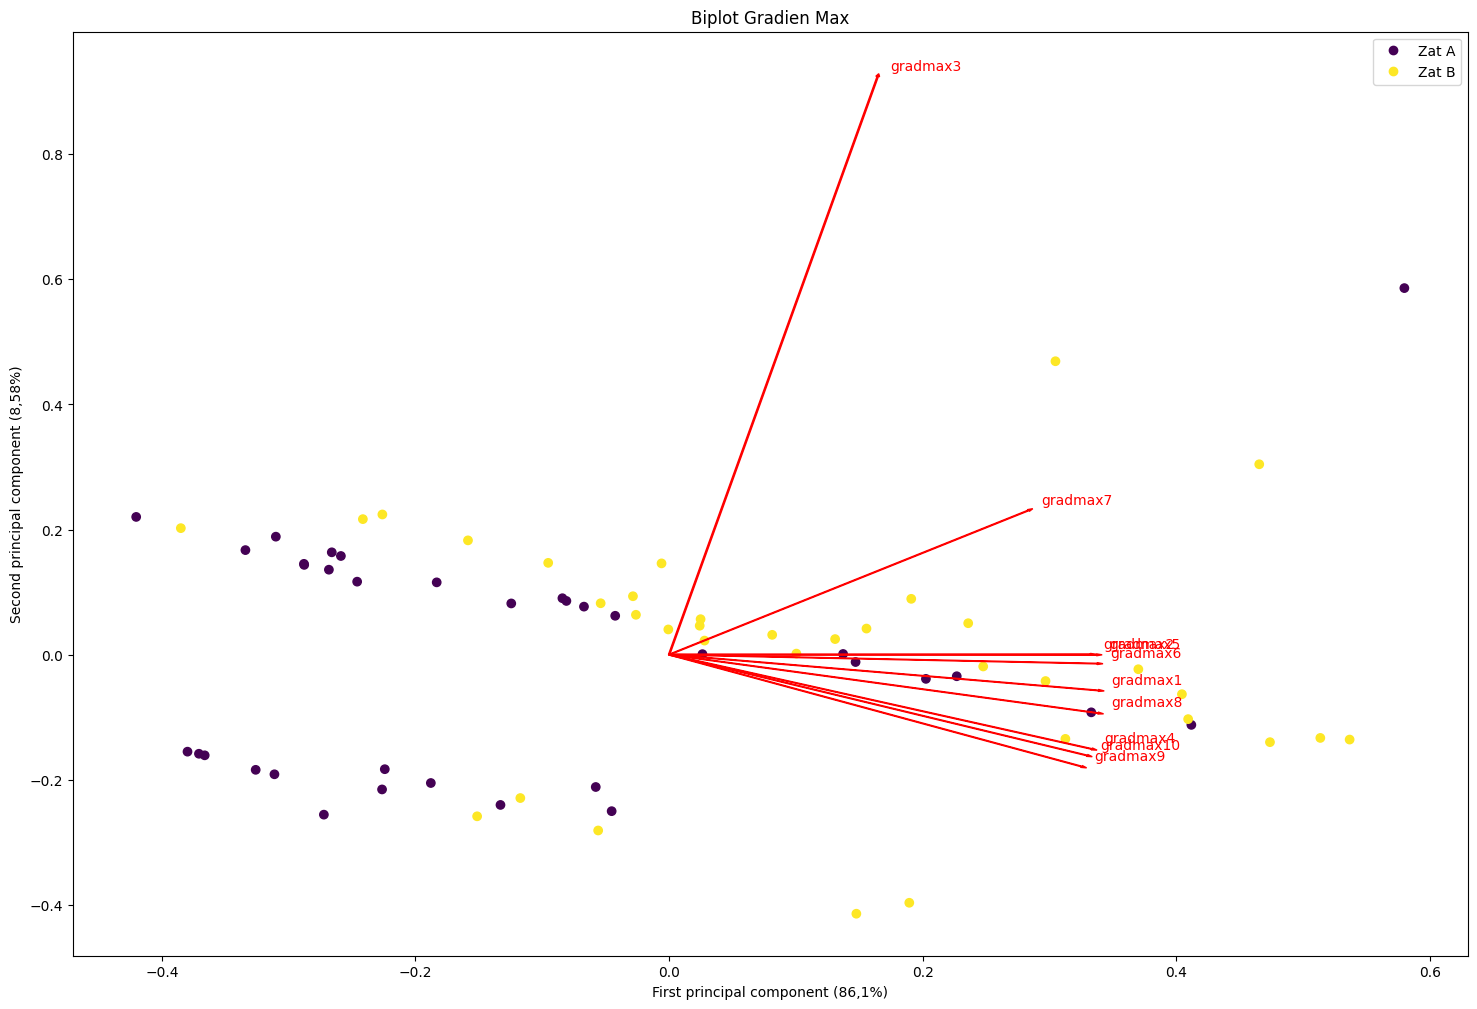

In [258]:
PC1 = pca_grad.fit_transform(zgrad)[:,0]
PC2 = pca_grad.fit_transform(zgrad)[:,1]
ldngs = pca_grad.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = zgrad.columns

plt.figure(figsize = (18,  12))
scatter = plt.scatter(pcacomponent[:, 0] * scalePC1, pcacomponent[:, 1] * scalePC2, c=b)
legend_labels = ['Zat A', 'Zat B']

for i in range(10):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i], fc='r', ec='r')
    plt.text(ldngs[0, i] + 0.01 , ldngs[1, i] + 0.01, f'gradmax{i+1}', color='r')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('Biplot Gradien Max')
plt.xlabel('First principal component (86,1%)')
plt.ylabel('Second principal component (8,58%)')
plt.show()


selanjutnya saya akan melakukan plotting untuk 3 PCA components (3D)

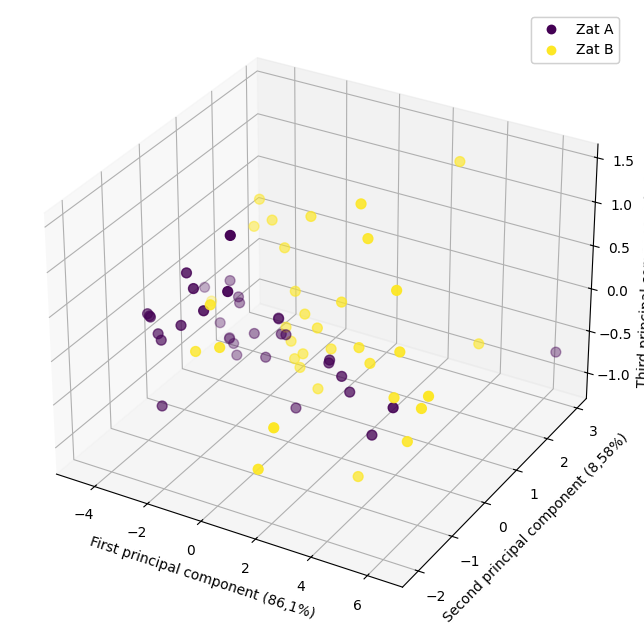

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ambil data gradien max kembali
pca1_grad = PCA(n_components=3)
pcacomponent1 = pca1_grad.fit_transform(zgrad)
input_list = np.array(grad['label'])
y = [0 if x == 'A' else 1 for x in input_list]

# Membuat plot 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot
legend_labels = ['Zat A', 'Zat B']
scatter = ax.scatter(pcacomponent1[:, 0], pcacomponent1[:, 1], pcacomponent1[:, 2], c=y, cmap='viridis', s=50)

# Menambahkan label pada sumbu
ax.set_xlabel('First principal component (86,1%)')
ax.set_ylabel('Second principal component (8,58%)')
ax.set_zlabel('Third principal component (3,32%)')

# Menambahkan legenda
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
ax.add_artist(legend)

plt.show()


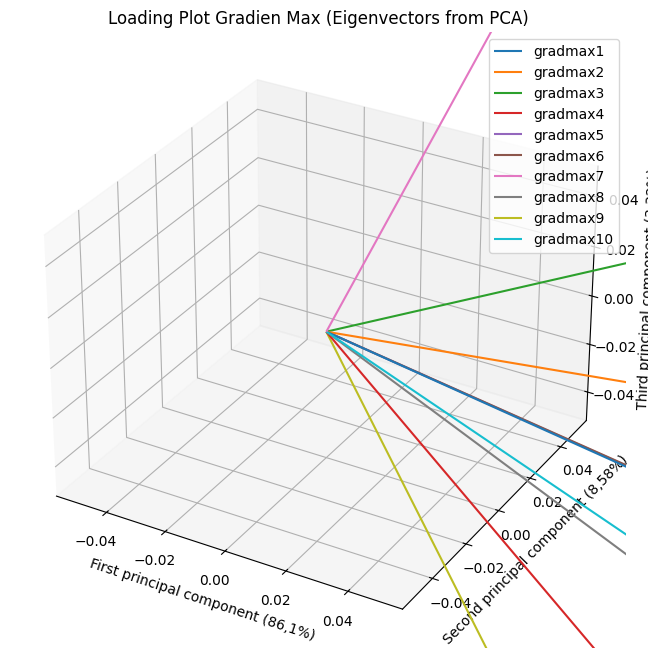

In [260]:
import numpy as np
import matplotlib.pyplot as plt

# Menyortir eigenvalue dan eigenvector secara menurun
sorted_indices = np.argsort(eigenvalues1)[::-1]
eigenvalues1 = eigenvalues1[sorted_indices]
loadings = pca1_grad.components_
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Membuat plot 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Memplot eigenvector
for i in range(loadings.shape[1]):
    ax.quiver(0, 0, 0, loadings[0, i], loadings[1, i], loadings[2, i], color=f'C{i}', label=f'gradmax{i+1}')


# Menambahkan label pada sumbu
ax.set_xlabel('First principal component (86,1%)')
ax.set_ylabel('Second principal component (8,58%)')
ax.set_zlabel('Third principal component (3,32%)')
ax.legend()

plt.title('Loading Plot Gradien Max (Eigenvectors from PCA)')
plt.grid(True)
plt.show()


In [261]:
# Kita lihat titik dari eigen vector

loadings2 = pd.DataFrame(pca1_grad.components_.T, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'], index=zgrad.columns)
loadings2

,Principal Component 1,Principal Component 2,Principal Component 3
gradmax F1,0.338694,-0.057281,-0.013605
gradmax F2,0.332194,0.000498,0.048123
gradmax F3,0.164501,0.924114,-0.309217
gradmax F4,0.333365,-0.150772,-0.145105
gradmax F5,0.336985,-0.000256,-0.064405
gradmax F6,0.337662,-0.014302,-0.050931
gradmax F7,0.283295,0.230475,0.878049
gradmax F8,0.338266,-0.093428,-0.080819
gradmax F9,0.325302,-0.178815,-0.310200
gradmax F10,0.329643,-0.161161,0.018997


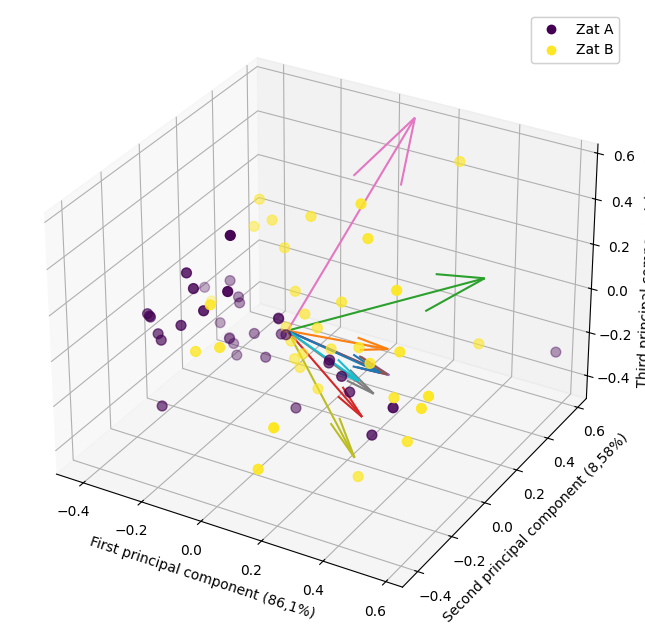

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ambil data gradien max kembali
pca1_grad = PCA(n_components=3)
pcacomponent1 = pca1_grad.fit_transform(zgrad)
input_list = np.array(grad['label'])
y = [0 if x == 'A' else 1 for x in input_list]
loadings = pca1_grad.components_

# Atur skala
PC1 = pca1_grad.fit_transform(zgrad)[:,0]
PC2 = pca1_grad.fit_transform(zgrad)[:,1]
PC3 = pca1_grad.fit_transform(zgrad)[:,2]

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
scalePC3 = 1.0/(PC3.max() - PC3.min())

# Membuat plot 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot
legend_labels = ['Zat A', 'Zat B']
scatter = ax.scatter(pcacomponent1[:, 0] * scalePC1, pcacomponent1[:, 1] * scalePC2, pcacomponent1[:, 2] * scalePC3, c=y, cmap='viridis', s=50)

# Memplot eigenvector
for i in range(loadings.shape[1]):
    ax.quiver(0, 0, 0, loadings[0, i], loadings[1, i], loadings[2, i], color=f'C{i}', label=f'gradmax{i+1}')
    
# Menambahkan label pada sumbu
ax.set_xlabel('First principal component (86,1%)')
ax.set_ylabel('Second principal component (8,58%)')
ax.set_zlabel('Third principal component (3,32%)')

# Menambahkan legenda
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
ax.add_artist(legend)

plt.show()


- FFT max

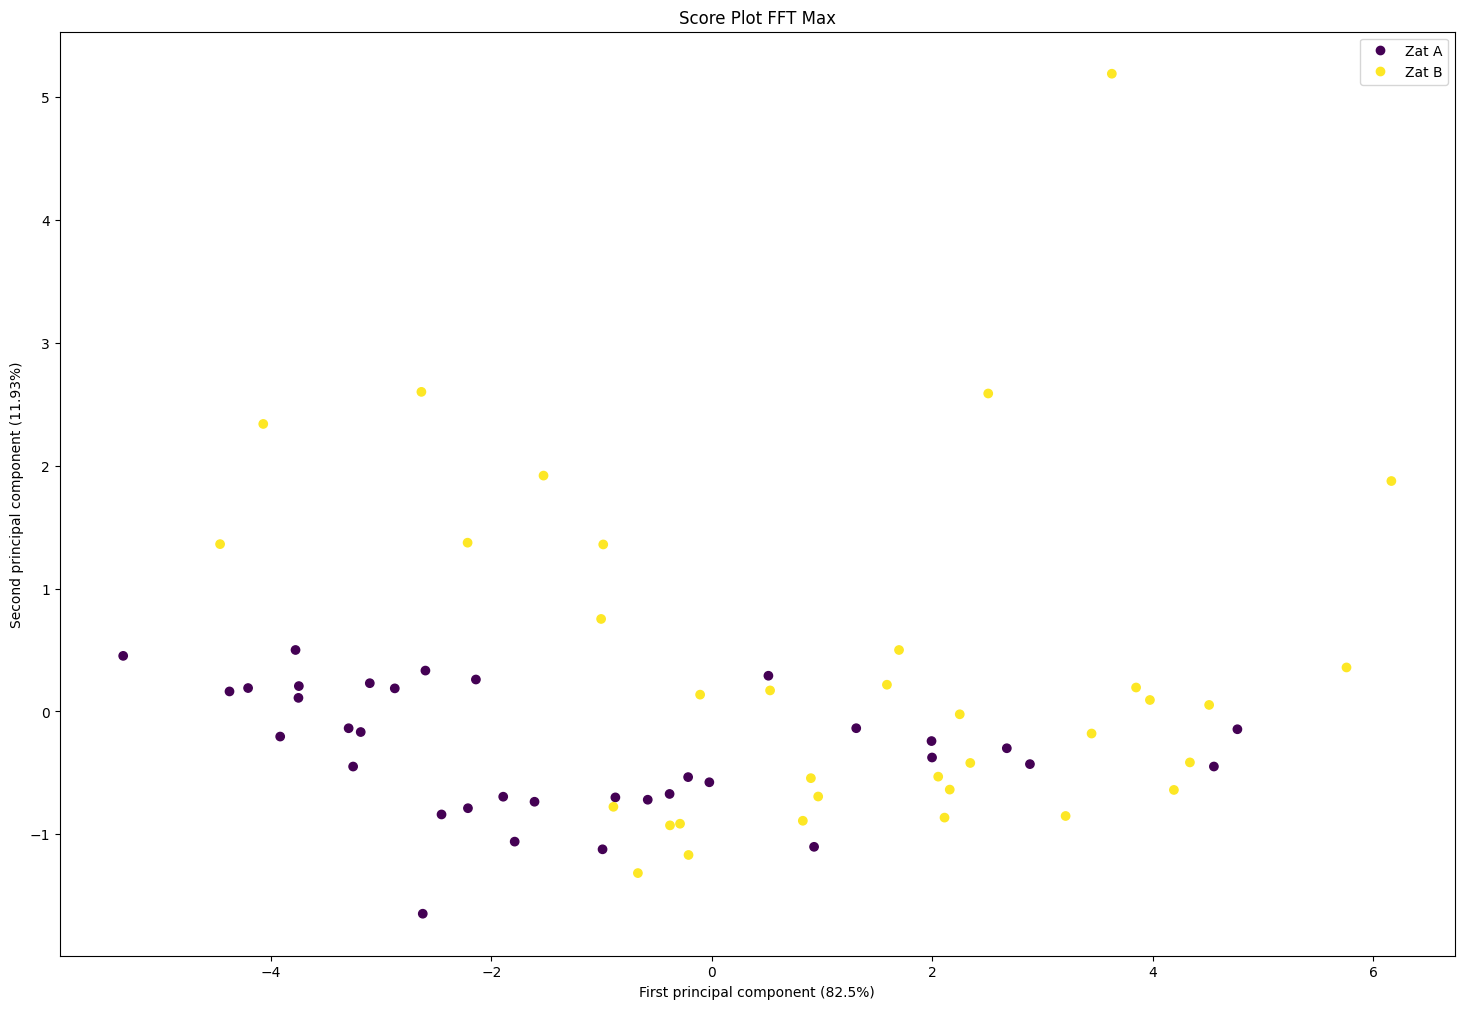

In [263]:
# Kita ubah label dari A dan B menjadi 0 dan 1
input_list = np.array(grad['label'])
b = [0 if x == 'A' else 1 for x in input_list]

# Kita plotting 
plt.figure(figsize = (18, 12))
scatter = plt.scatter(pcacomponent2[:, 0], pcacomponent2[:, 1], c=b)
legend_labels = ['Zat A', 'Zat B']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('Score Plot FFT Max')
plt.xlabel('First principal component (82.5%)')
plt.ylabel('Second principal component (11.93%)')
plt.show()

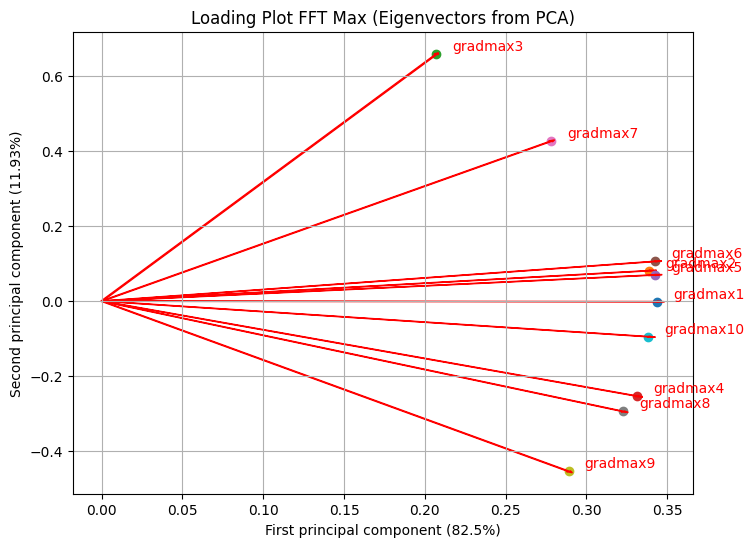

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Menyortir eigenvalue dan eigenvector secara menurun
sorted_indices = np.argsort(eigenvalues2)[::-1]
eigenvalues2 = eigenvalues2[sorted_indices]
eigenvectors2 = eigenvectors2[:, sorted_indices]
ldings = pca_fft.components_

# Memplot eigenvector
plt.figure(figsize = (8, 6))
for i in range(10):
    plt.scatter(ldings[0, i], ldings[1, i])
    plt.arrow(0, 0, ldings[0, i], ldings[1, i], fc='r', ec='r')
    plt.text(ldings[0, i] + 0.01 , ldings[1, i] + 0.01, f'gradmax{i+1}', color='r')

plt.xlabel('First principal component (82.5%)')
plt.ylabel('Second principal component (11.93%)')
plt.title('Loading Plot FFT Max (Eigenvectors from PCA)')
plt.grid(True)
plt.show()


In [265]:
# Kita lihat titik dari eigen vector

loadings3 = pd.DataFrame(pca_fft.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=zfft.columns)
loadings3

,Principal Component 1,Principal Component 2
fouriermax F1,0.343956,-0.001485
fouriermax F2,0.339097,0.081060
fouriermax F3,0.207067,0.657147
fouriermax F4,0.331314,-0.252880
fouriermax F5,0.342570,0.069779
fouriermax F6,0.342515,0.105808
fouriermax F7,0.277938,0.425586
fouriermax F8,0.322590,-0.293583
fouriermax F9,0.288987,-0.453089
fouriermax F10,0.338473,-0.094703


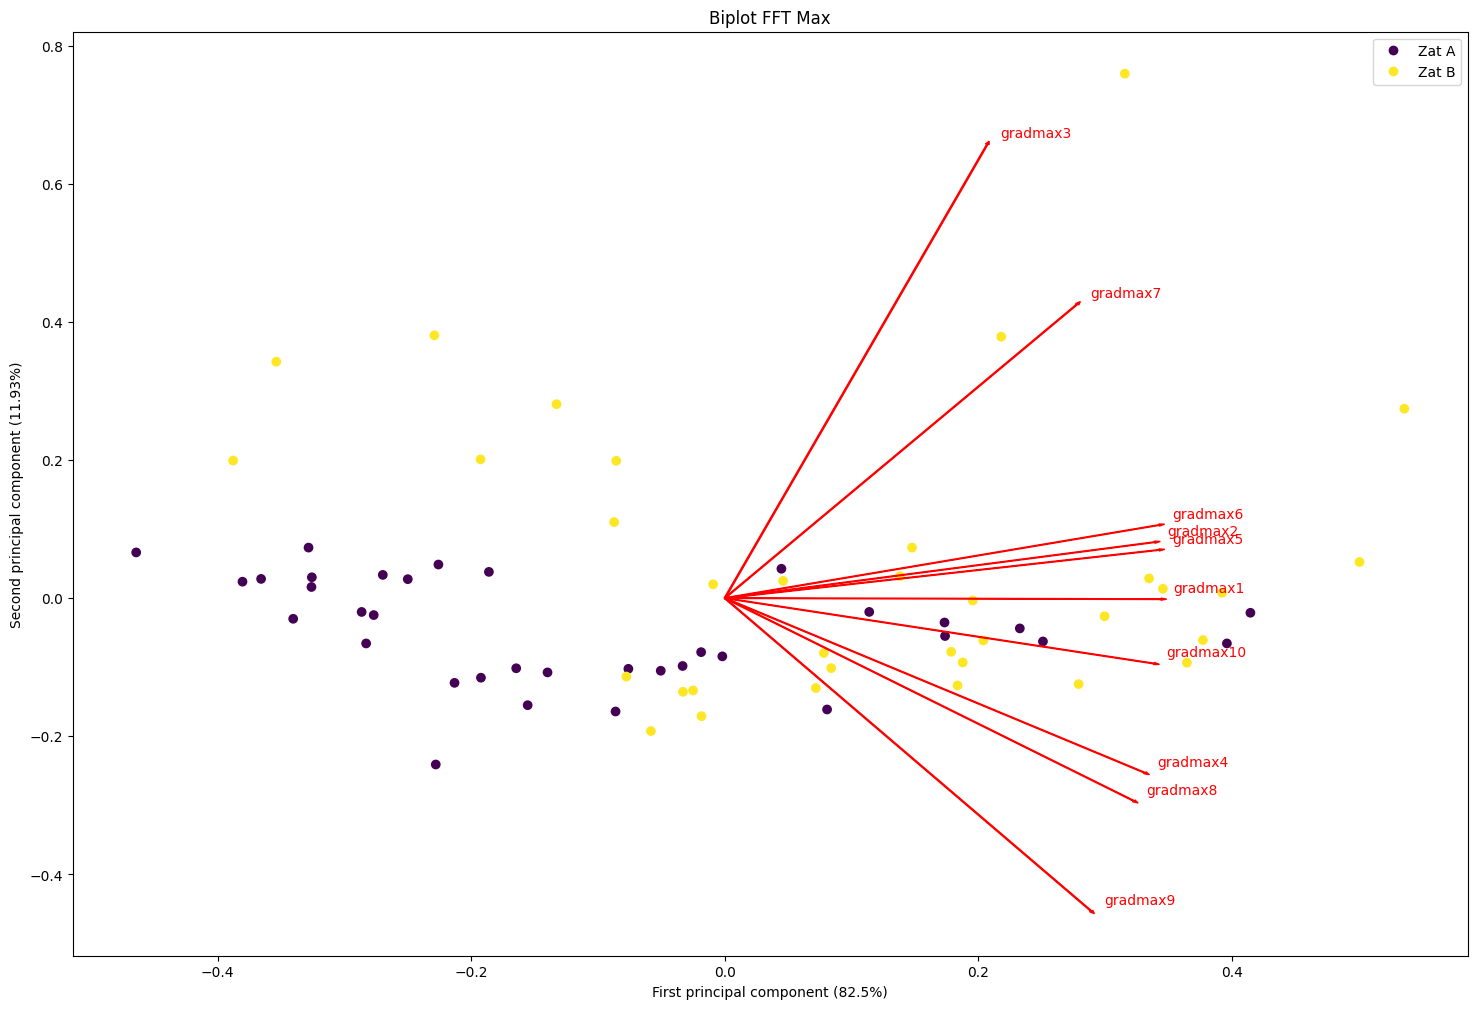

In [266]:
PC1 = pca_fft.fit_transform(zfft)[:,0]
PC2 = pca_fft.fit_transform(zfft)[:,1]
ldngs = pca_fft.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = zfft.columns

plt.figure(figsize = (18,  12))
scatter = plt.scatter(pcacomponent2[:, 0] * scalePC1, pcacomponent2[:, 1] * scalePC2, c=b)
legend_labels = ['Zat A', 'Zat B']

for i in range(10):
    # plt.scatter(ldngs[0, i], ldngs[1, i])
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i], fc='r', ec='r')
    plt.text(ldngs[0, i] + 0.01 , ldngs[1, i] + 0.01, f'gradmax{i+1}', color='r')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('Biplot FFT Max')
plt.xlabel('First principal component (82.5%)')
plt.ylabel('Second principal component (11.93%)')
plt.show()


Saya akan mencoba kembali untuk 3 PCA components (3D)

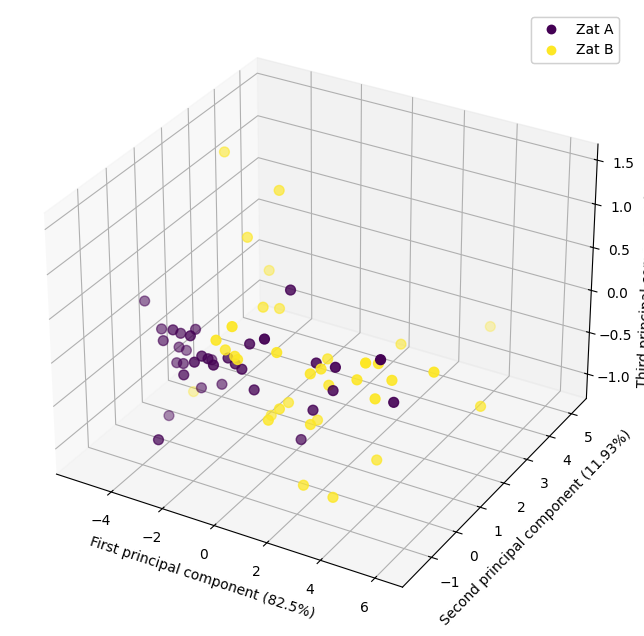

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ambil data gradien max kembali
pca1_fft = PCA(n_components=3)
pcacomponent3 = pca1_fft.fit_transform(zfft)
input_list = np.array(fft['label'])
y = [0 if x == 'A' else 1 for x in input_list]

# Membuat plot 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot
legend_labels = ['Zat A', 'Zat B']
scatter = ax.scatter(pcacomponent3[:, 0], pcacomponent3[:, 1], pcacomponent3[:, 2], c=y, cmap='viridis', s=50)

# Menambahkan label pada sumbu
ax.set_xlabel('First principal component (82.5%)')
ax.set_ylabel('Second principal component (11.93%)')
ax.set_zlabel('Third principal component (2.59%)')

# Menambahkan legenda
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
ax.add_artist(legend)

plt.show()


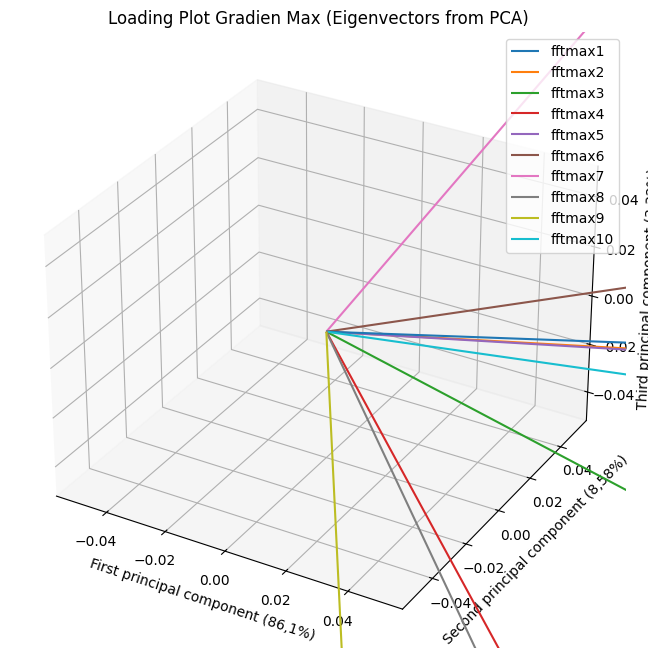

In [268]:
import numpy as np
import matplotlib.pyplot as plt

# Menyortir eigenvalue dan eigenvector secara menurun
sorted_indices = np.argsort(eigenvalues2)[::-1]
eigenvalues2 = eigenvalues2[sorted_indices]
ldngis = pca1_fft.components_
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Membuat plot 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Memplot eigenvector
for i in range(ldngis.shape[1]):
    ax.quiver(0, 0, 0, ldngis[0, i], ldngis[1, i], ldngis[2, i], color=f'C{i}', label=f'fftmax{i+1}')


# Menambahkan label pada sumbu
ax.set_xlabel('First principal component (86,1%)')
ax.set_ylabel('Second principal component (8,58%)')
ax.set_zlabel('Third principal component (3,32%)')
ax.legend()

plt.title('Loading Plot Gradien Max (Eigenvectors from PCA)')
plt.grid(True)
plt.show()

In [269]:
# Kita lihat titik dari eigen vector

loadings4 = pd.DataFrame(pca1_fft.components_.T, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'], index=zfft.columns)
loadings4

,Principal Component 1,Principal Component 2,Principal Component 3
fouriermax F1,0.343956,-0.001485,0.106073
fouriermax F2,0.339097,0.081060,0.043427
fouriermax F3,0.207067,0.657147,-0.701208
fouriermax F4,0.331314,-0.252880,-0.143535
fouriermax F5,0.342570,0.069779,0.049825
fouriermax F6,0.342515,0.105808,0.127601
fouriermax F7,0.277938,0.425586,0.577562
fouriermax F8,0.322590,-0.293583,-0.103485
fouriermax F9,0.288987,-0.453089,-0.308946
fouriermax F10,0.338473,-0.094703,0.126764


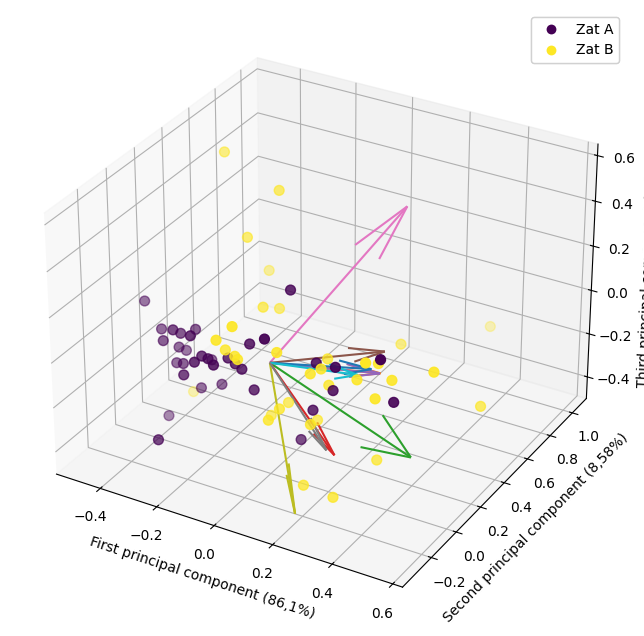

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ambil data gradien max kembali
pca1_fft = PCA(n_components=3)
pcacomponent3 = pca1_fft.fit_transform(zfft)
input_list = np.array(fft['label'])
y = [0 if x == 'A' else 1 for x in input_list]

# Atur skala
PC1 = pca1_fft.fit_transform(zgrad)[:,0]
PC2 = pca1_fft.fit_transform(zgrad)[:,1]
PC3 = pca1_fft.fit_transform(zgrad)[:,2]

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
scalePC3 = 1.0/(PC3.max() - PC3.min())

# Membuat plot 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot
legend_labels = ['Zat A', 'Zat B']
scatter = ax.scatter(pcacomponent3[:, 0] * scalePC1, pcacomponent3[:, 1] * scalePC2, pcacomponent3[:, 2] * scalePC3, c=y, cmap='viridis', s=50)

# Memplot eigenvector
for i in range(ldngis.shape[1]):
    ax.quiver(0, 0, 0, ldngis[0, i], ldngis[1, i], ldngis[2, i], color=f'C{i}', label=f'fftmax{i+1}')
    
# Menambahkan label pada sumbu
ax.set_xlabel('First principal component (86,1%)')
ax.set_ylabel('Second principal component (8,58%)')
ax.set_zlabel('Third principal component (3,32%)')

# Menambahkan legenda
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
ax.add_artist(legend)

plt.show()


### 3. Analisis Hasil Reduksi Dimensi

Menurut saya PCA masih sangat baik untuk mengurangi dimensi data tersebut karena terlihat dari nilai varians pada component yang digunakan masih besar, dengan rincian sebagai berikut: 
1. Gradien Maksimum
    - PCA 2-Component (Mencakup 94.69% data asli)
    - PCA 3-Component (Mencakup 99.02% data asli)

2. FFT Maksimum
    - PCA 2-Component (Mencakup 94.43% data asli)
    - PCA 3-Component (Mencakup 97.03% data asli)

Metode PCA digunakan apabila data yang dimiliki terdistribusi normal, dan akan menghasilkan fitur linear. Jika data sangat nonlinier atau tidak terdistribusi normal, kita dapat menggunakan metode pengurangan dimensi yang lain salah satunya adalah metode T-SNE

Kita lihat hubungan tiap komponen terhadap component PCA

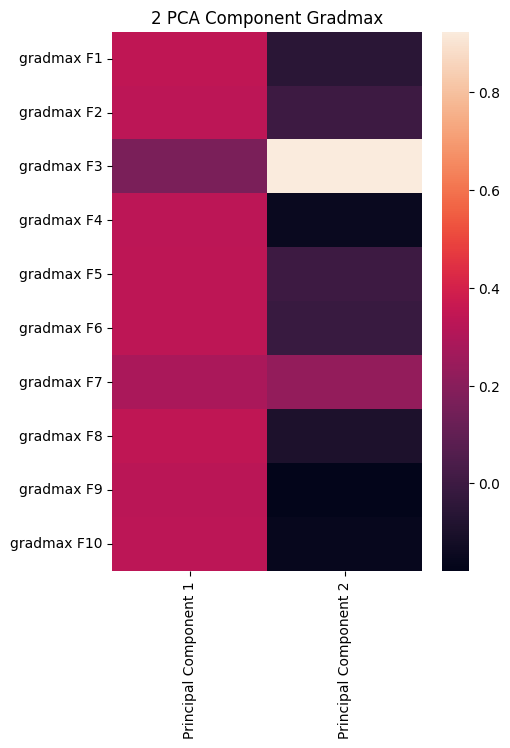

In [271]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(loadings1)
plt.title('2 PCA Component Gradmax')
plt.show()

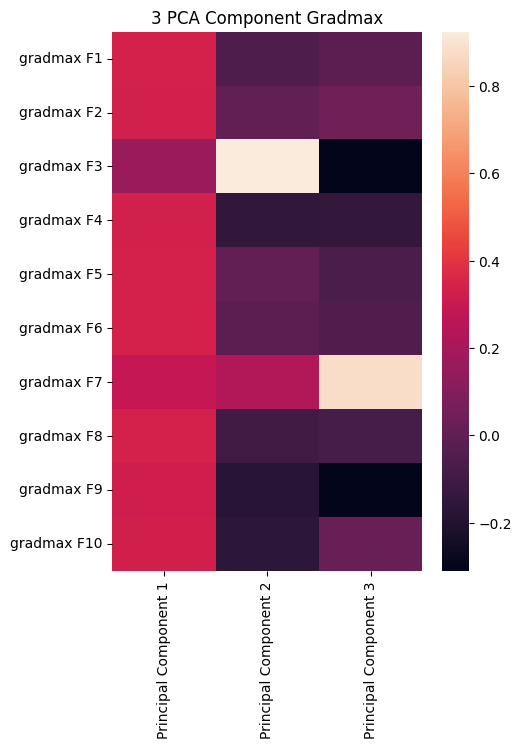

In [272]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(loadings2)
plt.title('3 PCA Component Gradmax')
plt.show()

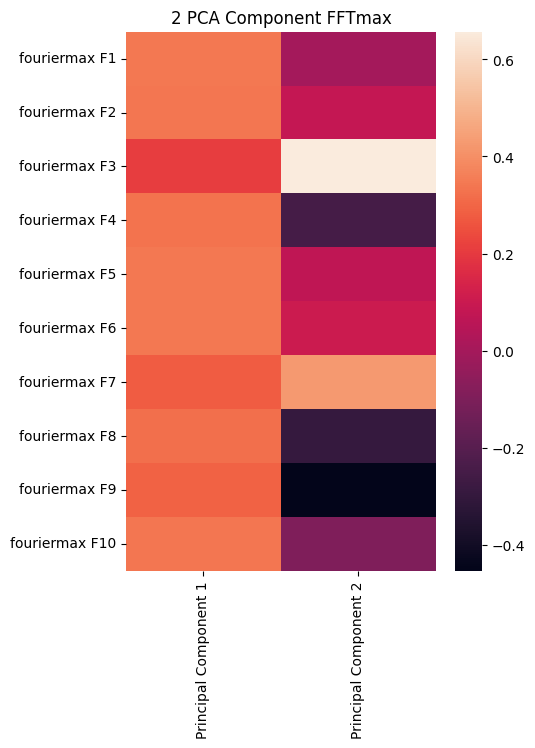

In [273]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(loadings3)
plt.title('2 PCA Component FFTmax')
plt.show()

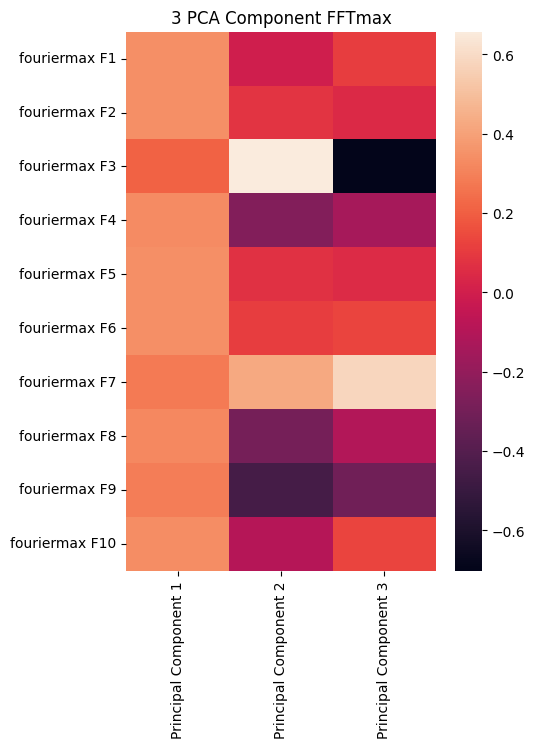

In [274]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(loadings4)
plt.title('3 PCA Component FFTmax')
plt.show()

Kita akan mencoba menggunakan metode T-SNE

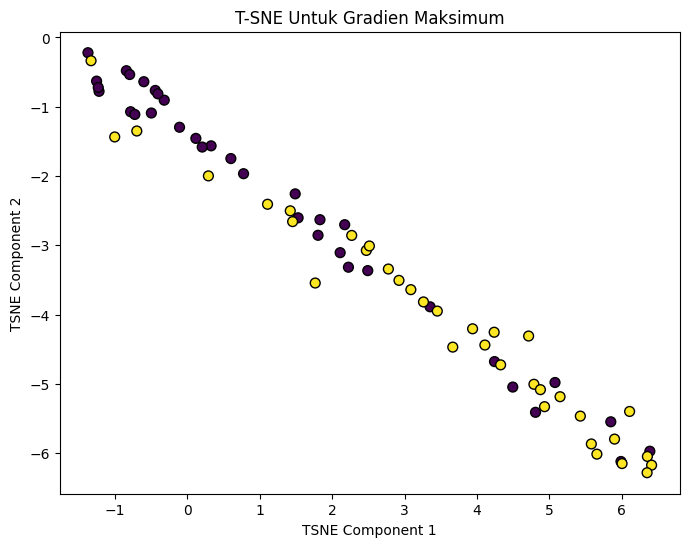

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Generate sample data with 10 columns
# np.random.seed(42)
newgrad = grad.drop('label', axis = 1)
data = newgrad
labels = y

# Apply T-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('T-SNE Untuk Gradien Maksimum')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()



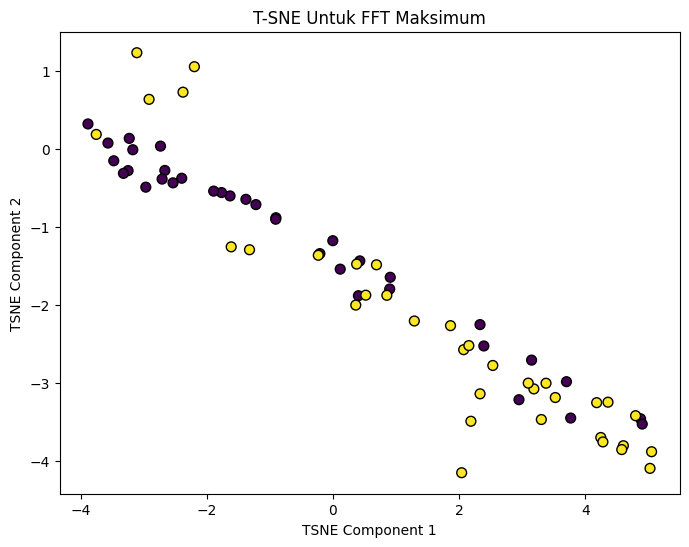

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Generate sample data with 10 columns
# np.random.seed(42)
newgrad = fft.drop('label', axis = 1)
data = newgrad
labels = y

# Apply T-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('T-SNE Untuk FFT Maksimum')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

